In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import datetime

In [2]:
meteo = pd.read_csv("meteo-nogal-09.csv",engine = "python")

meteo = pd.DataFrame({"DATE" : meteo["DATE"],
                      "TIME" : meteo["TIME"],
                      "airT_Avg" : meteo["airT_Avg"]})
# Unnames = []
# for i in range(0,len(meteo.columns)):
#     if(re.search("^Unnamed",meteo.columns[i]) != None):
#         Unnames.append(meteo.columns[i])
# Unnames

# meteo = meteo.drop(Unnames,1)
meteo = meteo.drop(0,0)



meteo["DATE"] = pd.to_datetime(meteo["DATE"],dayfirst=True)
meteo = meteo[meteo["DATE"] < "2010-01-01"]
tempD = meteo["DATE"]
tempT = meteo["TIME"]
meteo[meteo.columns] = meteo[meteo.columns].apply(pd.to_numeric, errors='coerce')
meteo["DATE"] = tempD
meteo["TIME"] = tempT
meteo["AÑO"] = meteo["DATE"].dt.year
meteo["MES"] = meteo["DATE"].dt.month
meteo["DIA"] = meteo["DATE"].dt.day
meteo["Tair_AvgDiaria"] = meteo.groupby(["AÑO","MES","DIA"])["airT_Avg"].transform("mean") 
meteo["Tair_max"] = meteo.groupby(["AÑO","MES","DIA"])["airT_Avg"].transform("max")
meteo["Tair_min"] = meteo.groupby(["AÑO","MES","DIA"])["airT_Avg"].transform("min") 



soil = pd.read_csv("soil-nogal-09.csv",engine = ("python"))
soil = pd.DataFrame({"AÑO" : soil["2 Year_RTM  L"],
                     "DIA" : soil["3 Day_RTM  L"],
                     "HORA" : soil["4 Hour_Minute_RTM  L"],
                     "Tsuelo_10cm" : soil["Tsuelo_10cm"],
                     "Tsuelo_20cm" : soil["Tsuelo_20cm"],
                     "Tsuelo_40cm" : soil["Tsuelo_40cm"],
                     "Tsuelo_85cm" : soil["Tsuelo_85cm"]})
soil["T_10cm MediaDiaria"] = soil.groupby("DIA")["Tsuelo_10cm"].transform("mean")
soil["T_10cm MinDiaria"] = soil.groupby("DIA")["Tsuelo_10cm"].transform("min")
soil["T_10cm MaxDiaria"] = soil.groupby("DIA")["Tsuelo_10cm"].transform("max")

soil["T_20cm MediaDiaria"] = soil.groupby("DIA")["Tsuelo_20cm"].transform("mean")
soil["T_20cm MinDiaria"] = soil.groupby("DIA")["Tsuelo_20cm"].transform("min")
soil["T_20cm MaxDiaria"] = soil.groupby("DIA")["Tsuelo_20cm"].transform("max")

soil["T_40cm MediaDiaria"] = soil.groupby("DIA")["Tsuelo_40cm"].transform("mean")
soil["T_40cm MinDiaria"] = soil.groupby("DIA")["Tsuelo_40cm"].transform("min")
soil["T_40cm MaxDiaria"] = soil.groupby("DIA")["Tsuelo_40cm"].transform("max")

soil["T_85cm MediaDiaria"] = soil.groupby("DIA")["Tsuelo_85cm"].transform("mean")
soil["T_85cm MinDiaria"] = soil.groupby("DIA")["Tsuelo_85cm"].transform("min")
soil["T_85cm MaxDiaria"] = soil.groupby("DIA")["Tsuelo_85cm"].transform("max")


soil.head()

,AÑO,DIA,HORA,Tsuelo_10cm,Tsuelo_20cm,Tsuelo_40cm,Tsuelo_85cm,T_10cm MediaDiaria,T_10cm MinDiaria,T_10cm MaxDiaria,T_20cm MediaDiaria,T_20cm MinDiaria,T_20cm MaxDiaria,T_40cm MediaDiaria,T_40cm MinDiaria,T_40cm MaxDiaria,T_85cm MediaDiaria,T_85cm MinDiaria,T_85cm MaxDiaria
0,2009,1,30,14.36,14.70,15.52,17.75,14.127292,13.52,14.77,14.549792,14.27,14.9,15.565,15.52,15.61,17.714583,17.69,17.75
1,2009,1,100,14.33,14.70,15.52,17.75,14.127292,13.52,14.77,14.549792,14.27,14.9,15.565,15.52,15.61,17.714583,17.69,17.75
2,2009,1,130,14.28,14.69,15.54,17.74,14.127292,13.52,14.77,14.549792,14.27,14.9,15.565,15.52,15.61,17.714583,17.69,17.75
3,2009,1,200,14.24,14.69,15.55,17.74,14.127292,13.52,14.77,14.549792,14.27,14.9,15.565,15.52,15.61,17.714583,17.69,17.75
4,2009,1,230,14.19,14.69,15.55,17.73,14.127292,13.52,14.77,14.549792,14.27,14.9,15.565,15.52,15.61,17.714583,17.69,17.75


In [3]:
meteo.tail()

,DATE,TIME,airT_Avg,AÑO,MES,DIA,Tair_AvgDiaria,Tair_max,Tair_min
52333,2009-12-31,23:10:00,0.482,2009,12,31,0.373306,0.547,0.141
52334,2009-12-31,23:20:00,0.489,2009,12,31,0.373306,0.547,0.141
52335,2009-12-31,23:30:00,0.500,2009,12,31,0.373306,0.547,0.141
52336,2009-12-31,23:40:00,0.509,2009,12,31,0.373306,0.547,0.141
52337,2009-12-31,23:50:00,0.516,2009,12,31,0.373306,0.547,0.141


In [4]:
soil.head()

,AÑO,DIA,HORA,Tsuelo_10cm,Tsuelo_20cm,Tsuelo_40cm,Tsuelo_85cm,T_10cm MediaDiaria,T_10cm MinDiaria,T_10cm MaxDiaria,T_20cm MediaDiaria,T_20cm MinDiaria,T_20cm MaxDiaria,T_40cm MediaDiaria,T_40cm MinDiaria,T_40cm MaxDiaria,T_85cm MediaDiaria,T_85cm MinDiaria,T_85cm MaxDiaria
0,2009,1,30,14.36,14.70,15.52,17.75,14.127292,13.52,14.77,14.549792,14.27,14.9,15.565,15.52,15.61,17.714583,17.69,17.75
1,2009,1,100,14.33,14.70,15.52,17.75,14.127292,13.52,14.77,14.549792,14.27,14.9,15.565,15.52,15.61,17.714583,17.69,17.75
2,2009,1,130,14.28,14.69,15.54,17.74,14.127292,13.52,14.77,14.549792,14.27,14.9,15.565,15.52,15.61,17.714583,17.69,17.75
3,2009,1,200,14.24,14.69,15.55,17.74,14.127292,13.52,14.77,14.549792,14.27,14.9,15.565,15.52,15.61,17.714583,17.69,17.75
4,2009,1,230,14.19,14.69,15.55,17.73,14.127292,13.52,14.77,14.549792,14.27,14.9,15.565,15.52,15.61,17.714583,17.69,17.75


In [5]:
soilDIA = soil.drop_duplicates("DIA").reset_index(drop=True)
soilDIA = soilDIA.drop(soilDIA.columns[3:7],1)
soilDIA.head()

,AÑO,DIA,HORA,T_10cm MediaDiaria,T_10cm MinDiaria,T_10cm MaxDiaria,T_20cm MediaDiaria,T_20cm MinDiaria,T_20cm MaxDiaria,T_40cm MediaDiaria,T_40cm MinDiaria,T_40cm MaxDiaria,T_85cm MediaDiaria,T_85cm MinDiaria,T_85cm MaxDiaria
0,2009,1,30,14.127292,13.52,14.77,14.549792,14.27,14.90,15.565000,15.52,15.61,17.714583,17.69,17.75
1,2009,2,30,14.629375,13.87,15.51,14.892500,14.62,15.35,15.728333,15.62,15.85,17.668750,17.65,17.69
2,2009,3,30,14.907917,14.09,15.71,15.204583,14.88,15.61,15.935208,15.86,16.02,17.660000,17.65,17.67
3,2009,4,30,15.047708,14.46,15.59,15.390833,15.15,15.61,16.087500,16.03,16.13,17.676458,17.66,17.69
4,2009,5,30,15.146667,14.70,15.57,15.481667,15.30,15.62,16.207708,16.15,16.23,17.698750,17.69,17.71


In [6]:
meteoDIA = meteo.drop_duplicates(["AÑO","MES","DIA"]).reset_index(drop=True)
meteoDIA = pd.DataFrame({"FECHA"          : meteoDIA["DATE"],
                         "Tair_AvgDiaria" : meteoDIA["Tair_AvgDiaria"],
                         "Tair_max"       : meteoDIA["Tair_max"],  
                         "Tair_min"       : meteoDIA["Tair_min"]})
meteoDIA.head()

,FECHA,Tair_AvgDiaria,Tair_max,Tair_min
0,2009-01-01,14.942629,25.35,5.938
1,2009-01-02,15.753194,26.00,8.420
2,2009-01-03,14.623035,22.54,7.837
3,2009-01-04,14.204236,20.55,8.310
4,2009-01-05,13.520007,19.45,6.797


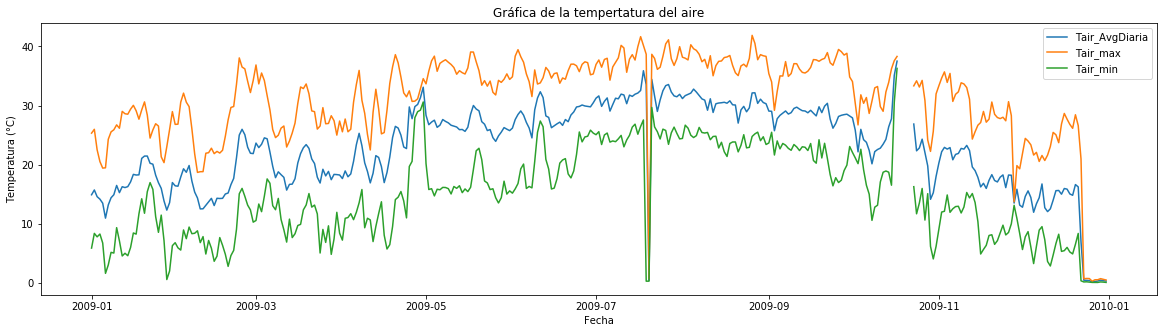

In [7]:
cosas = meteoDIA[["Tair_AvgDiaria","Tair_max","Tair_min"]]
plt.figure(figsize=(20,5))
plt.plot(meteoDIA["FECHA"],cosas)
plt.title("Gráfica de la tempertatura del aire")
plt.xlabel("Fecha")
plt.ylabel("Temperatura (°C)")
plt.legend(cosas)
plt.show()

In [8]:
#Obtiene todos los datos del primero de enero del dataframe soil
soil1dia = soil[soil["DIA"] == 1]

#Obtiene todos los datos del primero de enero promediados cada media hora del dataframe meteo
meteo1dia = []
hora = []
n = 0
suma = 0
for i in meteo.index:
    if (meteo["DIA"][i] == 1):
        if (n < 3) :
            n += 1
            suma += meteo["airT_Avg"][i]
        else:
            meteo1dia.append(suma/3)
            hora.append(meteo["TIME"][i-1])
            suma = meteo["airT_Avg"][i]
            n = 1
    else:
        suma += meteo["airT_Avg"][i]
        meteo1dia.append(suma/3)
        hora.append(meteo["TIME"][i])
        break

undia = pd.DataFrame({   "HORA" : hora,
                         "Taire" : meteo1dia,
                         "Tsuelo_10cm" : soil1dia["Tsuelo_10cm"],
                         "Tsuelo_20cm" : soil1dia["Tsuelo_20cm"],
                         "Tsuelo_40cm" : soil1dia["Tsuelo_40cm"],
                         "Tsuelo_85cm" : soil1dia["Tsuelo_85cm"]})

In [9]:
hora = []
for i in range(1,len(meteo1dia)):
    hora.append(datetime.timedelta(minutes=30*i))
hora.append(datetime.timedelta(minutes=0))

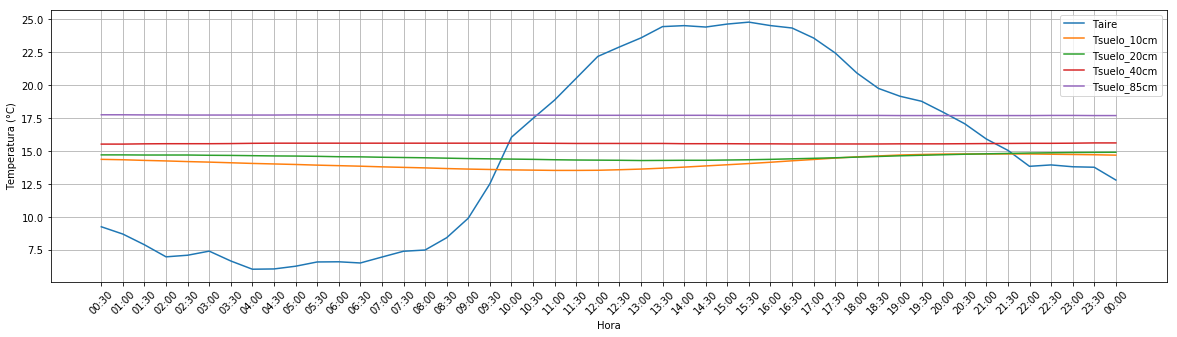

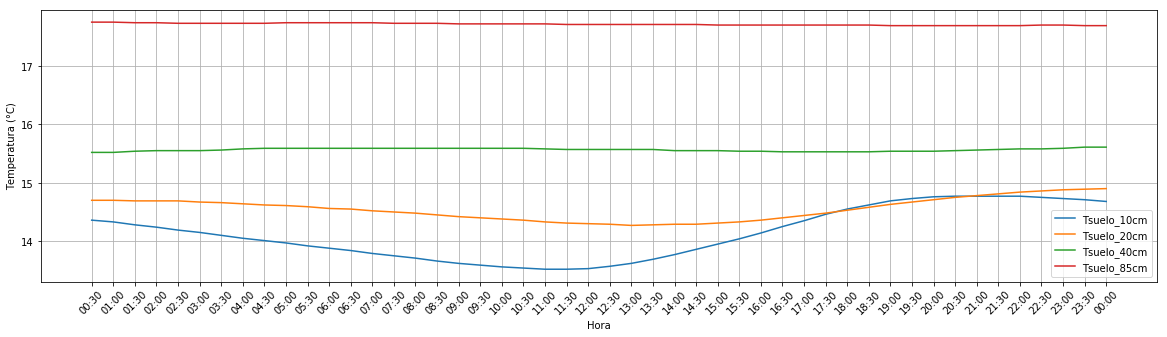

In [10]:
graf = undia[["Taire","Tsuelo_10cm","Tsuelo_20cm","Tsuelo_40cm","Tsuelo_85cm"]]

plt.figure(figsize = (20,5))
plt.xlabel("Hora")
plt.ylabel("Temperatura (°C)")
plt.grid()
plt.plot(undia.index,graf)
plt.xticks(np.arange(len(undia)), undia["HORA"], rotation = 45)
plt.legend(graf)
plt.show()

graf = undia[["Tsuelo_10cm","Tsuelo_20cm","Tsuelo_40cm","Tsuelo_85cm"]]
plt.figure(figsize = (20,5))
plt.xlabel("Hora")
plt.ylabel("Temperatura (°C)")
plt.grid()
plt.plot(undia.index,graf)
plt.xticks(np.arange(len(undia)), undia["HORA"], rotation = 45)
plt.legend(graf)
plt.show()

In [12]:

meteo.head()

,DATE,TIME,airT_Avg,AÑO,MES,DIA,Tair_AvgDiaria,Tair_max,Tair_min
1,2009-01-01,00:10,9.400000,2009,1,1,14.942629,25.35,5.938
2,2009-01-01,00:20,9.240000,2009,1,1,14.942629,25.35,5.938
3,2009-01-01,00:30,9.059999,2009,1,1,14.942629,25.35,5.938
4,2009-01-01,00:40,9.059999,2009,1,1,14.942629,25.35,5.938
5,2009-01-01,00:50,8.630000,2009,1,1,14.942629,25.35,5.938


In [39]:
dia = 1
n = 0
promedios = []
fecha = []
hora = []
prom = 0
for i in meteo.index:
    if(meteo["DIA"][i] == dia):
        if(n < 3):
            n+=1
            prom += meteo["airT_Avg"][i]
            dia = meteo["DIA"][i]
        else:
            promedios.append(prom/3)
            fecha.append(meteo["DATE"][i-1])
            hora.append(meteo["TIME"][i-1])
            prom = meteo["airT_Avg"][i]
            dia = meteo["DIA"][i]
            n = 1
    else:
        promedios.append(prom/3)
        fecha.append(meteo["DATE"][i])
        hora.append(meteo["TIME"][i])
        prom = meteo["airT_Avg"][i]
        dia = meteo["DIA"][i]
        n = 1

In [40]:
dataframe = pd.DataFrame({
    "FECHA" : fecha,
    "HORA" : hora,
    "PROM" : promedios
})

In [41]:
dataframe[40:50]

,FECHA,HORA,PROM
40,2009-01-01,20:30,17.066667
41,2009-01-01,21:00,15.906667
42,2009-01-01,21:30,15.043333
43,2009-01-01,22:00,13.830000
44,2009-01-01,22:30,13.936667
45,2009-01-01,23:00,13.796667
46,2009-01-01,23:30,13.760000
47,2009-01-02,00:00,8.780000
48,2009-01-02,00:20,11.536667
49,2009-01-02,00:50,10.803333


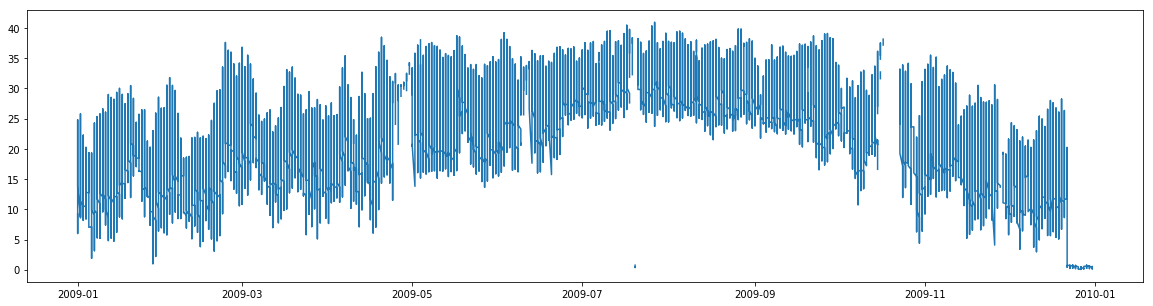

In [46]:
plt.figure(figsize = (20,5))
plt.plot(dataframe["FECHA"],dataframe["PROM"])
plt.show()